In [23]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
import pyspark.sql.functions as fn
import matplotlib.pyplot as plt
from pyspark_dist_explore import hist

conf = SparkConf().setAppName("Spark Count")
sc = SparkContext.getOrCreate(conf=conf)

spark = SparkSession \
    .builder \
    .appName("Python Spark create RDD example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Reading the json the data using pyspark dataframe

In [24]:
df = spark.read.json(r"E:\Documents\University of Hildesheim\Distributed data analytics\lab8\students.json")
df.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

# Replace the null values in column['points'] by the mean of all points
- the function fill_with_mean uses aggregate function to find the avg of all the values in points column.
- then that value is the replaced with the null values by selecting only points column excluding other columns from the process.

In [25]:
def fill_with_mean(df, exclude=set()): 
    stats = df.agg(*(
        fn.avg(c).alias(c) for c in df.columns if c not in exclude
    ))
    return df.na.fill(stats.first().asDict())
df=fill_with_mean(df, ['course', 'dob', 'first_name', 'last_name','s_id'])
df.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

# Replace the null value(s) in column dob by "unknown"

In [26]:
df=df.na.fill('unknown',['dob'])
df.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

# Replace the null value(s) in column last name by "--"

In [27]:
df=df.na.fill('--',['last_name'])
df.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|       --|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

# Converting dob column to DD-MM-YYYY
- first the date the converted by using to_data function which converts the date to YYYY-MM-DD

In [28]:
def to_date_(col, formats=("MMM dd, yyyy", "dd MMM yyyy")):
    return fn.coalesce(*[fn.to_date(col, f) for f in formats])
df=df.withColumn("dob",to_date_("dob"))
df.show()


+------------------+----------+----------+---------+------+----+
|            course|       dob|first_name|last_name|points|s_id|
+------------------+----------+----------+---------+------+----+
|Humanities and Art|1983-10-14|      Alan|      Joe|    10|   1|
|  Computer Science|1980-09-26|    Martin|  Genberg|    17|   2|
|    Graphic Design|1982-06-12|     Athur|   Watson|    16|   3|
|    Graphic Design|1987-04-05|  Anabelle|  Sanberg|    12|   4|
|        Psychology|1978-11-01|      Kira| Schommer|    11|   5|
|          Business|1981-02-17| Christian|   Kiriam|    10|   6|
|  Machine Learning|1984-01-01|   Barbara|  Ballard|    14|   7|
|     Deep Learning|1978-01-13|      John|       --|    10|   8|
|  Machine Learning|1989-12-26|    Marcus|   Carson|    15|   9|
|           Physics|1987-12-30|     Marta|   Brooks|    11|  10|
|    Data Analytics|1975-06-12|     Holly| Schwartz|    12|  11|
|  Computer Science|1985-07-02|     April|    Black|    11|  12|
|  Computer Science|1980-

#### YYYY-MM-DD is the converted to DD-MM-YYYY using the function date_format

In [29]:
df=df.withColumn('dob', fn.date_format('dob', 'dd-MM-yyyy'))
df.show()

+------------------+----------+----------+---------+------+----+
|            course|       dob|first_name|last_name|points|s_id|
+------------------+----------+----------+---------+------+----+
|Humanities and Art|14-10-1983|      Alan|      Joe|    10|   1|
|  Computer Science|26-09-1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|12-06-1982|     Athur|   Watson|    16|   3|
|    Graphic Design|05-04-1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|01-11-1978|      Kira| Schommer|    11|   5|
|          Business|17-02-1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|01-01-1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|13-01-1978|      John|       --|    10|   8|
|  Machine Learning|26-12-1989|    Marcus|   Carson|    15|   9|
|           Physics|30-12-1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|12-06-1975|     Holly| Schwartz|    12|  11|
|  Computer Science|02-07-1985|     April|    Black|    11|  12|
|  Computer Science|22-07

# The age is callculated by subtracting the current time and the dob column and casting to interger

In [30]:
df=df.withColumn("age_in_years",(fn.months_between(fn.to_date(fn.current_date(),'dd-MM-yyyy' ),fn.to_date(df.dob,'dd-MM-yyyy'))/12).cast("int"))
df.show()

+------------------+----------+----------+---------+------+----+------------+
|            course|       dob|first_name|last_name|points|s_id|age_in_years|
+------------------+----------+----------+---------+------+----+------------+
|Humanities and Art|14-10-1983|      Alan|      Joe|    10|   1|          35|
|  Computer Science|26-09-1980|    Martin|  Genberg|    17|   2|          38|
|    Graphic Design|12-06-1982|     Athur|   Watson|    16|   3|          37|
|    Graphic Design|05-04-1987|  Anabelle|  Sanberg|    12|   4|          32|
|        Psychology|01-11-1978|      Kira| Schommer|    11|   5|          40|
|          Business|17-02-1981| Christian|   Kiriam|    10|   6|          38|
|  Machine Learning|01-01-1984|   Barbara|  Ballard|    14|   7|          35|
|     Deep Learning|13-01-1978|      John|       --|    10|   8|          41|
|  Machine Learning|26-12-1989|    Marcus|   Carson|    15|   9|          29|
|           Physics|30-12-1987|     Marta|   Brooks|    11|  10|

# Granting some points for good performed students in the class
- At first the standard deviation is calculated for all the students
- then the mean is calculated to add it with standard deviation and find the perform variable 
- which is used to give full marks to students who has current marks greater than the perform variable

In [32]:
def fill_with_std(df, exclude=set()): 
    stats = df.agg(*(
        fn.stddev(c).alias(c) for c in df.columns if c not in exclude
    ))
    return df.fill(stats.first().asDict())
df_stats= df.select(fn.stddev(df.points).alias('std')).collect()
std = df_stats[0]['std']
df_stats_mean= df.select(fn.mean(df.points).alias('std')).collect()
mean = df_stats_mean[0]['std']
perform=std+mean
df = df.withColumn("points", fn.when(df.points > perform, 20).otherwise(fn.col('points')))
df.show(truncate=False)

+------------------+----------+----------+---------+------+----+------------+
|course            |dob       |first_name|last_name|points|s_id|age_in_years|
+------------------+----------+----------+---------+------+----+------------+
|Humanities and Art|14-10-1983|Alan      |Joe      |10    |1   |35          |
|Computer Science  |26-09-1980|Martin    |Genberg  |20    |2   |38          |
|Graphic Design    |12-06-1982|Athur     |Watson   |20    |3   |37          |
|Graphic Design    |05-04-1987|Anabelle  |Sanberg  |12    |4   |32          |
|Psychology        |01-11-1978|Kira      |Schommer |11    |5   |40          |
|Business          |17-02-1981|Christian |Kiriam   |10    |6   |38          |
|Machine Learning  |01-01-1984|Barbara   |Ballard  |14    |7   |35          |
|Deep Learning     |13-01-1978|John      |--       |10    |8   |41          |
|Machine Learning  |26-12-1989|Marcus    |Carson   |20    |9   |29          |
|Physics           |30-12-1987|Marta     |Brooks   |11    |10  |

# Histogram on the new points

(array([1., 0., 1., 0., 0., 0., 2., 0., 4., 0., 3., 0., 3., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([ 6.        ,  6.46666667,  6.93333333,  7.4       ,  7.86666667,
         8.33333333,  8.8       ,  9.26666667,  9.73333333, 10.2       ,
        10.66666667, 11.13333333, 11.6       , 12.06666667, 12.53333333,
        13.        , 13.46666667, 13.93333333, 14.4       , 14.86666667,
        15.33333333, 15.8       , 16.26666667, 16.73333333, 17.2       ,
        17.66666667, 18.13333333, 18.6       , 19.06666667, 19.53333333,
        20.        ]),
 <a list of 30 Patch objects>)

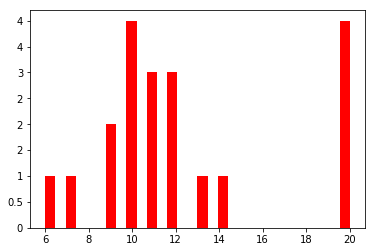

In [33]:
a=df.select('points')
fig, ax = plt.subplots()
hist(ax, a, bins = 30, color=['red'])